In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
user_df = pd.read_csv('./data/user_profile.csv')

In [3]:
user_df.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [4]:
user_df.shape

(33918, 15)

In [5]:
user_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.391800e+04,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000
mean,1.064585e+06,5.516334,3.492128,2.307359,3.623062,1.001356,3.046583,0.001769,5.085058,4.748246,0.462763,1.017277,2.270004,0.315821,0.986349
std,4.976768e+05,7.610825,4.226876,3.840945,4.759554,2.353706,4.623319,0.072828,5.230443,7.215123,1.054972,2.342241,4.309794,1.363292,1.950221
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.814510e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.044066e+06,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.451875e+06,9.000000,6.000000,3.000000,6.000000,0.000000,3.000000,0.000000,9.000000,6.000000,0.000000,0.000000,3.000000,0.000000,2.000000
max,2.103114e+06,63.000000,18.000000,38.000000,48.000000,15.000000,39.000000,3.000000,32.000000,54.000000,6.000000,18.000000,54.000000,15.000000,12.000000


In [6]:
feature_names = list(user_df.columns[1:])
feature_names

['Database',
 'Python',
 'CloudComputing',
 'DataAnalysis',
 'Containers',
 'MachineLearning',
 'ComputerVision',
 'DataScience',
 'BigData',
 'Chatbot',
 'R',
 'BackendDev',
 'FrontendDev',
 'Blockchain']

In [7]:
scaler = StandardScaler()
user_df[feature_names] = scaler.fit_transform(user_df[feature_names])

In [8]:
user_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04,3.391800e+04
mean,1.064585e+06,1.173135e-17,8.924206e-17,1.089340e-17,-9.217489e-18,-1.072581e-16,4.943926e-17,1.298828e-17,7.206401e-17,4.357359e-17,-3.686996e-17,1.235982e-17,-6.536038e-17,1.194084e-17,1.089340e-17
std,4.976768e+05,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,2.000000e+00,-7.248117e-01,-8.261845e-01,-6.007357e-01,-7.612299e-01,-4.254443e-01,-6.589699e-01,-2.429002e-02,-9.722184e-01,-6.581060e-01,-4.386561e-01,-4.343241e-01,-5.267161e-01,-2.316637e-01,-5.057703e-01
25%,6.814510e+05,-7.248117e-01,-8.261845e-01,-6.007357e-01,-7.612299e-01,-4.254443e-01,-6.589699e-01,-2.429002e-02,-9.722184e-01,-6.581060e-01,-4.386561e-01,-4.343241e-01,-5.267161e-01,-2.316637e-01,-5.057703e-01
50%,1.044066e+06,-3.306305e-01,-1.164300e-01,-6.007357e-01,-1.309095e-01,-4.254443e-01,-6.589699e-01,-2.429002e-02,-3.986448e-01,-3.809064e-01,-4.386561e-01,-4.343241e-01,-5.267161e-01,-2.316637e-01,-5.057703e-01
75%,1.451875e+06,4.577320e-01,5.933245e-01,1.803335e-01,4.994110e-01,-4.254443e-01,-1.007580e-02,-2.429002e-02,7.485024e-01,1.734929e-01,-4.386561e-01,-4.343241e-01,1.693832e-01,-2.316637e-01,5.197695e-01
max,2.103114e+06,7.552994e+00,3.432343e+00,9.292808e+00,9.323897e+00,5.947577e+00,7.776654e+00,4.116916e+01,5.145900e+00,6.826284e+00,5.248782e+00,7.250736e+00,1.200307e+01,1.077128e+01,5.647468e+00


In [9]:
user = user_df.iloc[-1,1:]

In [10]:
features = user_df.loc[:,user_df.columns!='user']
features

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,6.107663,2.486003,0.961403,8.273363,0.849160,6.478865,-0.02429,4.572326,5.024486,1.457157,7.250736,7.362409,6.370102,2.570849
1,4.530938,-0.353015,0.440690,5.121761,-0.425444,2.369203,-0.02429,2.851606,2.668290,-0.438656,2.127362,0.865482,-0.231664,0.519769
2,2.428638,1.066494,4.085680,4.281334,-0.425444,5.829971,-0.02429,3.233988,1.282291,1.457157,5.542945,5.506144,2.702454,2.570849
3,-0.462024,-0.826185,-0.600736,-0.341016,-0.425444,-0.658970,-0.02429,-0.972218,-0.380906,-0.438656,-0.434324,-0.526716,-0.231664,-0.505770
4,0.063551,-0.826185,-0.600736,0.079197,-0.425444,-0.658970,-0.02429,-0.972218,0.173493,-0.438656,0.419571,-0.526716,-0.231664,-0.505770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33913,-0.724812,-0.826185,0.180334,-0.761230,2.123764,-0.658970,-0.02429,-0.972218,-0.658106,-0.438656,-0.434324,0.169383,-0.231664,-0.505770
33914,-0.724812,-0.826185,0.180334,-0.761230,2.123764,-0.658970,-0.02429,-0.972218,-0.658106,-0.438656,-0.434324,0.169383,-0.231664,-0.505770
33915,-0.724812,-0.826185,0.180334,-0.761230,2.123764,-0.658970,-0.02429,-0.972218,-0.658106,-0.438656,-0.434324,0.169383,-0.231664,-0.505770
33916,-0.724812,-0.826185,0.180334,-0.761230,2.123764,-0.658970,-0.02429,-0.972218,-0.658106,-0.438656,-0.434324,0.169383,-0.231664,-0.505770


In [11]:
user_ids = user_df.loc[:,user_df.columns=='user']
user_ids

,user
0,2
1,4
2,5
3,7
4,8
...,...
33913,2103110
33914,2103111
33915,2103112
33916,2103113


In [12]:
s = []
for k in range(1,30):
    km = KMeans(n_init='auto',n_clusters=k)
    km.fit_predict(features)
    s.append(km.inertia_)


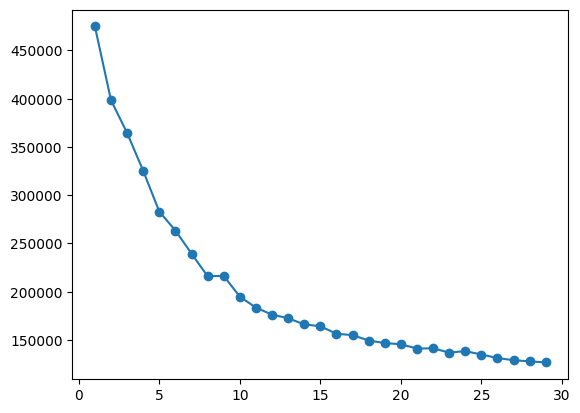

In [13]:
plt.plot(list(range(1,30)),s)
plt.scatter(list(range(1,30)),s)

In [14]:
cluster_labels = [None] * len(user_ids)

In [15]:
features.iloc[0,:]

Database           6.107663
Python             2.486003
CloudComputing     0.961403
DataAnalysis       8.273363
Containers         0.849160
MachineLearning    6.478865
ComputerVision    -0.024290
DataScience        4.572326
BigData            5.024486
Chatbot            1.457157
R                  7.250736
BackendDev         7.362409
FrontendDev        6.370102
Blockchain         2.570849
Name: 0, dtype: float64

In [16]:
model = KMeans(n_init='auto',n_clusters=20)
model.fit_predict(features)
cluster_labels = model.labels_
model.labels_

array([ 9,  9, 18, ..., 10, 10, 10])

In [17]:
def combine_cluster_labels(user_ids,labels):
    labels_df = pd.DataFrame(labels)
    cluster_df = pd.merge(user_ids,labels_df,left_index=True,right_index=True)
    cluster_df.columns = ['user','cluster']
    return cluster_df

In [51]:
cluster_df = combine_cluster_labels(user_ids,cluster_labels)
cluster_df.head(50)

,user,cluster
0,2,9
1,4,9
2,5,18
3,7,6
4,8,6
5,9,13
6,12,14
7,16,16
8,17,6
9,19,6
